# Ejercicio 1
Si $y= \Phi (x) = exp(x)$ y $p(x) = 1$, para $0 \le x \le 1$ es decir, es una distribución uniforme. ¿Cuál es la distribución resutante para $y$ ?

Tenemos la siguiente ecuación: 

$$p(y) = p(\Phi^{-1}(y)) \, \left \lvert{\frac{d \Phi^{-1}(y)}{dx}}\right \rvert$$

Considerando que $\Phi^{-1}(y) = x = ln(y)$ y que $1\le y \le e$, tenemos que:

$$p(\Phi^{-1}(y)) = p(x) = 1$$

y 

$$\left \lvert{\frac{d \Phi^{-1}(y)}{dx}}\right \rvert = \left \lvert{\frac{d \, ln(y)}{dy}}\right \rvert = \left \lvert {1 \over y}\right \rvert = {1 \over y}$$

Por lo tanto:

$$p(y) = {1 \over y}$$

# Ejercicio 2
Si el flujo sigue una distribución Gaussiana, ¿Cómo es la distribución en magnitud? $mag = -2.5log_{10}(flux)$


Para simplificar, consideraremos $flux = x$ y $mag = y$, entonces:

$$p(x) = {1 \over \sigma \sqrt{2 \pi}} exp\left (- \frac{(x - \mu)^2}{2 \sigma ^2} \right ) = p(\Phi^{-1}(y))$$

y 

$$y = - 2.5 log_{10}(x)$$

Obtenemos $\Phi^{-1}(y)$:

$$\Phi^{-1}(y) = x = 10^{- {y \over 2.5}}$$

Derivamos  esta función:

$$\left \lvert \frac{d \Phi^{-1}(y)}{dy} \right \rvert = \left \lvert - {ln10 \over 2.5} 10^{-y \over 2.5} \right \rvert = {ln 10 \over 2.5} \, 10^{-y \over 2.5}$$

Por lo tanto, la probabilidad de $y$ es:

$$p(y) = {ln 10 \over 2.5 \sigma \sqrt{2 \pi}} 10^{-y \over 2.5} exp\left (- \frac{(10^{- {y \over 2.5}} - \mu)^2}{2 \sigma ^2} \right )$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from pylab import rcParams
import scipy.special as sp
from random import random

%matplotlib inline
rcParams['figure.figsize'] = (10, 6)

Text(0,0.5,'p(flux)')

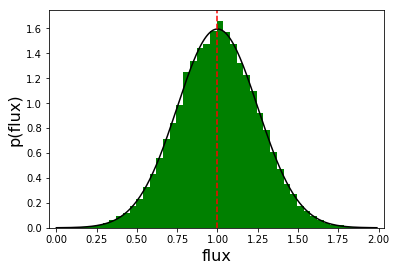

In [27]:
#Hacemos un arreglo con valores entre 0 y 2 para el flux
flux = np.arange(0,2, 0.01)

#Definimos la funcion de probabilidad del flux
def Pflux(x, mu, sigma):
    return 1/(sigma*math.sqrt(2*math.pi))*np.exp(-(x-mu)**2/(2*sigma**2))

#Asignamos valores para la media y la desviacion estandar
mu = 1
sigma = 0.25

#Graficamos flux vs p(flux)
plt.plot(flux,Pflux(flux, mu, sigma), 'k')

#Graficamos una recta vertical en el valor de la media
plt.axvline(x = mu, color='r', linestyle = '--')

#Generamos valores aleatorios entre 0 y 1
F_flux = np.array([random() for i in range(40000)])

#Utilizando la funcion de distribucion acumulada inversa, obtenemos los valores para el flujo (flux)
Flux = math.sqrt(2) * sigma * sp.erfinv(2 * F_flux - 1) + mu

#Graficamos el histograma
n, bins, patches = plt.hist(Flux, bins = 50, density = True, color = 'g')
plt.xlim([min(Flux), max(Flux)])
plt.xlabel('flux', fontsize = 16)
plt.ylabel('p(flux)', fontsize = 16)

Para poder generar el histograma de $mag$, necesitamos obtener la función de distribución acumulada (CDF) inversa. Vamos a obtener primero la CDF a partir de la función de probabilidad obtenida anteriormente:

$$F(x) = \int_{-\infty}^x p(y) \, dy$$

Siendo $p(y) = {ln 10 \over 2.5 \sigma \sqrt{2 \pi}}10^{-y \over 2.5} exp \left ( - \frac{\left (10^{-y \over 2.5} - \mu \right )^2}{2 \sigma^2}\right )$ y considerando que $y = mag$

Al sustituir $p(y)$ en $F(x)$ y haciendo el cambio de variable $u = 10^{-y \over 2.5}$ con $du = -{ln 10 \over 2.5} 10^{-y \over 2.5} dy$, obtenemos:

$$F(x) = - {1 \over \sigma \sqrt{2\pi}} \int_{\infty}^{10^{-x \over 2.5}}exp \left ( -\frac{(u- \mu)^2}{2 \sigma^2} \right ) \, du$$

Invirtiendo los límites y haciendo el cambio de variable $t = {u - \mu \over \sigma \sqrt{2}}$ con $dt = {du \over \sigma \sqrt{2}}$ llegamos a:

$$F(x) = {1 \over \sqrt{\pi}} \int_{\frac{10^{-x \over 2.5} - \mu}{\sigma \sqrt{2}}}^\infty \, e^{-t^2} \, dt$$

Tomando en cuenta que $1- erf(x) = {2 \over \sqrt{\pi}}\int_x^\infty e^{-t^2}\, dt$, llegamos a:

$$F(x) = {1 \over 2} \left [ 1- erf \left ( \frac{10^{-x \over 2.5} - \mu}{\sqrt{2} \sigma} \right ) \right ]$$

Podemos obtener la CDF inversa, $P^{-1}(F)$ simplemente despejando $x$ de $F(x)$:

$$P^{-1}(F) = -2.5 \, \log_{10}\left [ \sqrt{2} \sigma \,  erf^{-1}(1-2F) + \mu \right ]$$

(Nótese que $\sqrt{2} \sigma \,  erf^{-1}(1-2F) + \mu > 0$)

Text(0,0.5,'p(mag)')

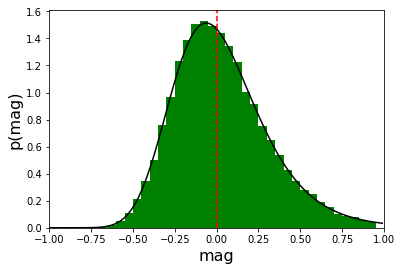

In [28]:
#Hacemos un arreglo entre -1 y 1 para mag
x = np.arange(-1,1, 0.01)

#Hacemos otro arreglo para la probabilidad de mag, Pmag
Pmag = math.log(10)/(2.5*sigma*math.sqrt(2*math.pi))*np.power(10,(-1)*x/2.5)*np.exp(-(np.power(10,(-1)*x/2.5) - mu)**2/(2*sigma**2))

#Graficamos la funcion de Pmag
plt.plot(x, Pmag, 'k')

#Graficamo sla linea vertical
plt.axvline(x = 0, color = 'r', linestyle = '--')

#Calculamos el valor maximo que puede tomar la CDF para que su inversa exista
maximo = 0.5 * (1 - sp.erf(-mu/(math.sqrt(2)*sigma)))

#Generamos los valores para mag a partir de la CDF inversa
Fmag = np.array([])
for i in range(40000):
    fmag = random()
    if fmag < maximo:
        Fmag = np.append(Fmag, fmag)
Mag = -2.5*np.log10(math.sqrt(2) * sigma * sp.erfinv(1-2*Fmag) + mu)

#Columnas para el histograma
Bins = np.arange(-1.0, 1.0, 0.05)

#Generamos el histograma 
n, bins, patches = plt.hist(Mag, bins = Bins, density = True, color = 'g')

plt.xlim([-1, 1])
plt.xlabel('mag', fontsize = 16)
plt.ylabel('p(mag)', fontsize = 16)